### NY 15 Day Forecast:COVID-19 Deaths
- Filtered data to include dates April to December to reduce number of 0 values
- NY is a larger dataset
- Larger population
- Higher number of reported cases

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC  
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
from statsmodels.tsa.arima_model import ARMA

In [3]:
covid = pd.read_csv("covid-states.csv")
covid.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-12-02,AK,A,122.0,122.0,0,NaN,768.0,768.0,164.0,...,1024643.0,6015,NaN,NaN,NaN,NaN,NaN,0,1024643.0,6015
1,2020-12-02,AL,A,3711.0,3326.0,73,385.0,25821.0,25821.0,1801.0,...,1603523.0,9681,NaN,NaN,73187.0,NaN,1603523.0,9681,NaN,0
2,2020-12-02,AR,A+,2522.0,2312.0,10,210.0,9110.0,9110.0,1088.0,...,1703266.0,11813,NaN,21856.0,NaN,144866.0,NaN,0,1703266.0,11813
3,2020-12-02,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-12-02,AZ,A+,6739.0,6237.0,52,502.0,26312.0,26312.0,2699.0,...,2288204.0,16290,365871.0,NaN,NaN,NaN,2288204.0,16290,NaN,0


In [4]:
#print("Size/Shape of the dataset",covid.shape)
#print("Checking for null values:\n",covid.isnull().sum())
#print("Checking Data-type:",covid.dtypes)

In [5]:
covid.columns

Index(['date', 'state', 'dataQualityGrade', 'death', 'deathConfirmed',
       'deathIncrease', 'deathProbable', 'hospitalized',
       'hospitalizedCumulative', 'hospitalizedCurrently',
       'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently', 'negative',
       'negativeIncrease', 'negativeTestsAntibody',
       'negativeTestsPeopleAntibody', 'negativeTestsViral',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral'

In [6]:
#Drop columns
covid.drop(['dataQualityGrade','deathIncrease',\
       'deathProbable','hospitalizedCumulative','hospitalizedIncrease',\
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',\
       'negativeTestsViral', 'onVentilatorCumulative','positiveScore',\
       'positiveTestsAntibody', 'positiveTestsAntigen',\
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',\
       'totalTestEncountersViralIncrease', 'totalTestResults',\
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',\
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen'],1,inplace = True)

In [7]:
# Cut the data by date - start date April end date December
start_date = '2020-04-01'
end_date = '2020-12-02'
mask = (covid['date'] > start_date) & (covid['date'] <= end_date)
covid  = covid.loc[mask]
covid

,date,state,death,deathConfirmed,hospitalized,hospitalizedCurrently,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,...,positive,positiveCasesViral,positiveIncrease,positiveTestsViral,recovered,totalTestEncountersViral,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-12-02,AK,122.0,122.0,768.0,164.0,NaN,NaN,992112.0,5318,...,32531.0,NaN,697,39543.0,7165.0,NaN,NaN,0,1024643.0,6015
1,2020-12-02,AL,3711.0,3326.0,25821.0,1801.0,2252.0,NaN,1390351.0,6546,...,256828.0,213172.0,3928,NaN,168387.0,NaN,1603523.0,9681,NaN,0
2,2020-12-02,AR,2522.0,2312.0,9110.0,1088.0,NaN,393.0,1562561.0,10306,...,161521.0,140705.0,2212,NaN,142600.0,NaN,NaN,0,1703266.0,11813
3,2020-12-02,AS,0.0,NaN,NaN,NaN,NaN,NaN,1988.0,0,...,0.0,0.0,0,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-12-02,AZ,6739.0,6237.0,26312.0,2699.0,NaN,642.0,1957887.0,12811,...,340979.0,330317.0,3840,NaN,53694.0,NaN,2288204.0,16290,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13715,2020-04-02,VT,17.0,NaN,45.0,29.0,NaN,NaN,4384.0,222,...,390.0,390.0,31,NaN,15.0,NaN,5055.0,504,4871.0,209
13716,2020-04-02,WA,310.0,NaN,NaN,NaN,NaN,NaN,90749.0,4774,...,7796.0,7796.0,397,NaN,NaN,98545.0,95017.0,4907,NaN,0
13717,2020-04-02,WI,31.0,NaN,461.0,192.0,NaN,103.0,20317.0,1498,...,2040.0,1730.0,219,NaN,NaN,24139.0,NaN,0,NaN,0
13718,2020-04-02,WV,2.0,NaN,1.0,NaN,NaN,NaN,5276.0,892,...,217.0,217.0,26,NaN,NaN,NaN,NaN,0,NaN,0


In [8]:
#Data Analysis for Washington DC
ny_data = covid[covid["state"]=="NY"]
ny_data.head()

,date,state,death,deathConfirmed,hospitalized,hospitalizedCurrently,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,...,positive,positiveCasesViral,positiveIncrease,positiveTestsViral,recovered,totalTestEncountersViral,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
37,2020-12-02,NY,26889.0,NaN,89995.0,3924.0,NaN,742.0,19097486.0,184578,...,664238.0,664238.0,8973,NaN,86201.0,19761724.0,NaN,0,NaN,0
93,2020-12-01,NY,26816.0,NaN,89995.0,3774.0,NaN,718.0,18912908.0,139390,...,655265.0,655265.0,7285,NaN,85808.0,19568173.0,NaN,0,NaN,0
149,2020-11-30,NY,26747.0,NaN,89995.0,3532.0,NaN,681.0,18773518.0,142155,...,647980.0,647980.0,6819,NaN,85556.0,19421498.0,NaN,0,NaN,0
205,2020-11-29,NY,26690.0,NaN,89995.0,3372.0,NaN,667.0,18631363.0,150597,...,641161.0,641161.0,6723,NaN,85287.0,19272524.0,NaN,0,NaN,0
261,2020-11-28,NY,26632.0,NaN,89995.0,3287.0,NaN,654.0,18480766.0,146292,...,634438.0,634438.0,6063,NaN,84938.0,19115204.0,NaN,0,NaN,0


In [9]:
ny_data = ny_data.fillna(0)
ny_data.head()

,date,state,death,deathConfirmed,hospitalized,hospitalizedCurrently,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,...,positive,positiveCasesViral,positiveIncrease,positiveTestsViral,recovered,totalTestEncountersViral,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
37,2020-12-02,NY,26889.0,0.0,89995.0,3924.0,0.0,742.0,19097486.0,184578,...,664238.0,664238.0,8973,0.0,86201.0,19761724.0,0.0,0,0.0,0
93,2020-12-01,NY,26816.0,0.0,89995.0,3774.0,0.0,718.0,18912908.0,139390,...,655265.0,655265.0,7285,0.0,85808.0,19568173.0,0.0,0,0.0,0
149,2020-11-30,NY,26747.0,0.0,89995.0,3532.0,0.0,681.0,18773518.0,142155,...,647980.0,647980.0,6819,0.0,85556.0,19421498.0,0.0,0,0.0,0
205,2020-11-29,NY,26690.0,0.0,89995.0,3372.0,0.0,667.0,18631363.0,150597,...,641161.0,641161.0,6723,0.0,85287.0,19272524.0,0.0,0,0.0,0
261,2020-11-28,NY,26632.0,0.0,89995.0,3287.0,0.0,654.0,18480766.0,146292,...,634438.0,634438.0,6063,0.0,84938.0,19115204.0,0.0,0,0.0,0


In [10]:
ny_data.drop(['deathConfirmed','hospitalized','inIcuCumulative',\
       'positiveCasesViral', 'positiveTestsViral',\
       'totalTestsViral','totalTestsViralIncrease'],1,inplace = True)

In [11]:
ny_data = ny_data.sort_values(by = 'date', ascending = True)
ny_data.head()

,date,state,death,hospitalizedCurrently,inIcuCurrently,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestEncountersViral,totalTestsPeopleViral,totalTestsPeopleViralIncrease
13701,2020-04-02,NY,2373.0,13383.0,3396.0,146584.0,9362,0.0,92381.0,8669,7434.0,238965.0,0.0,0
13645,2020-04-03,NY,2935.0,14810.0,3731.0,157657.0,11073,0.0,102863.0,10482,8886.0,260520.0,0.0,0
13589,2020-04-04,NY,3565.0,15905.0,4126.0,169917.0,12260,0.0,113704.0,10841,10478.0,283621.0,0.0,0
13533,2020-04-05,NY,4159.0,16479.0,4376.0,180249.0,10332,0.0,122031.0,8327,12187.0,302280.0,0.0,0
13477,2020-04-06,NY,4758.0,16837.0,4504.0,190122.0,9873,0.0,130689.0,8658,13366.0,320811.0,0.0,0


In [13]:
# Export the NY data csv 
ny_data.to_csv("ny_covid.csv")

In [14]:
# Specified data columns
X = ny_data[['hospitalizedCurrently','inIcuCurrently','onVentilatorCurrently','positive']]
y = ny_data['death']
wt=[1/y.shape[0]*i for i in range(y.shape[0])]

<AxesSubplot:xlabel='date', ylabel='totalTestEncountersViral'>

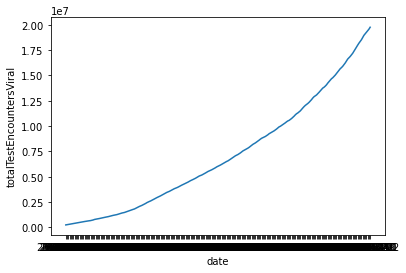

In [15]:
sns.lineplot(x='date',y='totalTestEncountersViral',data=ny_data)

<AxesSubplot:xlabel='date', ylabel='hospitalizedCurrently'>

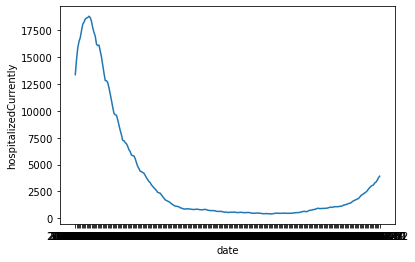

In [16]:
sns.lineplot(x='date',y='hospitalizedCurrently',data=ny_data)

<AxesSubplot:xlabel='date', ylabel='inIcuCurrently'>

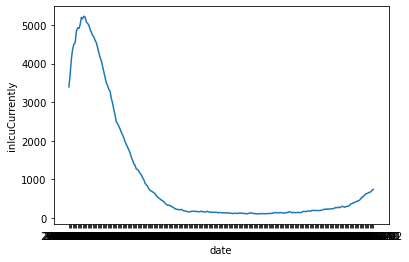

In [17]:
sns.lineplot(x='date',y='inIcuCurrently',data=ny_data)

<AxesSubplot:xlabel='date', ylabel='onVentilatorCurrently'>

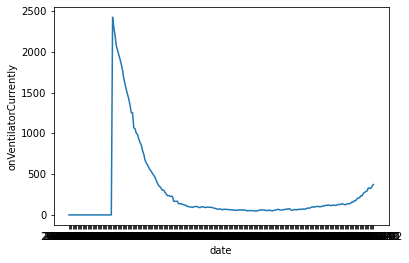

In [18]:
sns.lineplot(x='date',y='onVentilatorCurrently',data=ny_data)

In [19]:
ny_data.set_index('date', inplace =True)


In [20]:
# Specified data columns
X = ny_data[['hospitalizedCurrently','inIcuCurrently','onVentilatorCurrently','positive']]
y = ny_data['death']

In [21]:
# 
print(X.shape, y.shape)

(245, 4) (245,)


<Figure size 1440x720 with 0 Axes>

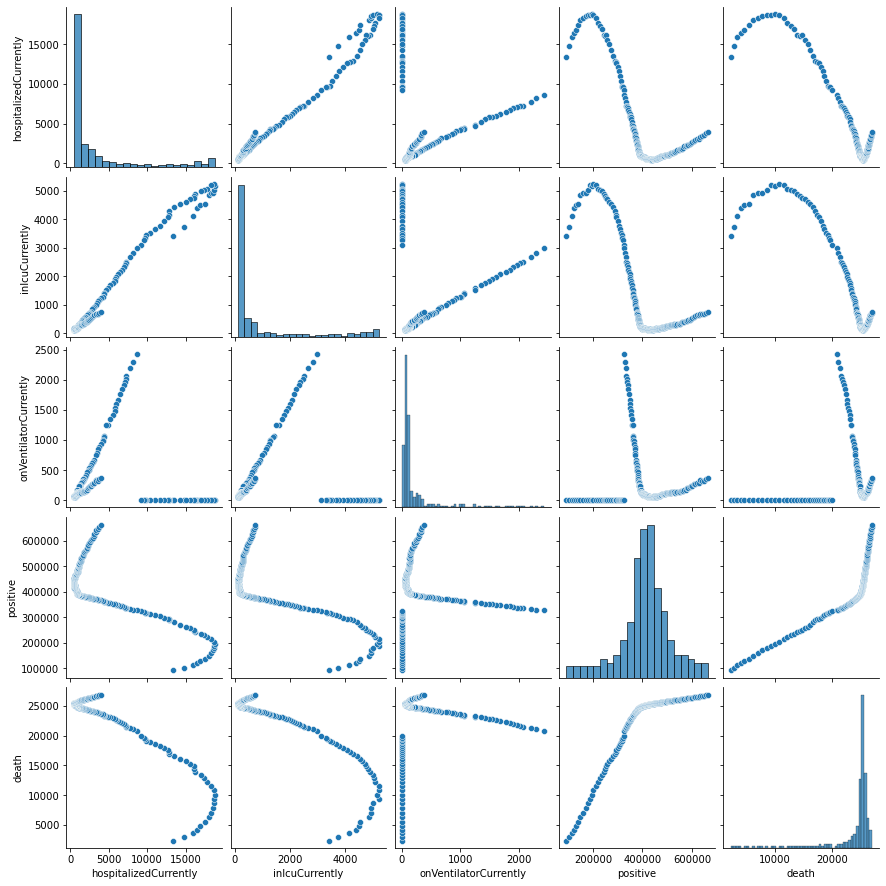

In [23]:
data_numeric = ny_data[['hospitalizedCurrently','inIcuCurrently','onVentilatorCurrently','positive','death']]
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

## Model - LinearRegression

In [24]:
# Specified data columns
# Reshape your data either using array.reshape(-1, 1) 
#if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
X = ny_data[['hospitalizedCurrently','inIcuCurrently','onVentilatorCurrently','positive']]
y = ny_data['death'].values.reshape(-1,1)

In [25]:
#number of 15 days forecast - split test data into the future and training data into past
n_days = 15
X_train = X.iloc[0:-n_days,:]
y_train = y[0:-n_days,:]
wt_train = wt[0:-n_days]
X_test = X.iloc[-n_days:,:]
y_test = y[-n_days:,:]

In [26]:
X_train.head()

,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,positive
date,,,,
2020-04-02,13383.0,3396.0,0.0,92381.0
2020-04-03,14810.0,3731.0,0.0,102863.0
2020-04-04,15905.0,4126.0,0.0,113704.0
2020-04-05,16479.0,4376.0,0.0,122031.0
2020-04-06,16837.0,4504.0,0.0,130689.0


In [27]:
model = LinearRegression()
model

LinearRegression()

In [28]:
model.fit(X_train, y_train, sample_weight=wt_train)

LinearRegression()

In [29]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [30]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9311632333769446
Testing Data Score: -11.077619564637512


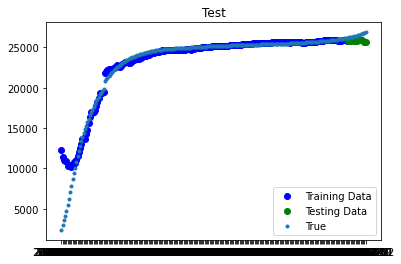

In [31]:
x = ny_data.index.values
x_train = x[:-n_days]
x_test = x[-n_days:]

plt.scatter(x_train,y_pred_train, c="blue", label="Training Data")
plt.scatter(x_test,y_pred_test, c="green", label="Testing Data")
plt.scatter(x,y, marker=".", label="True")

plt.legend()
plt.title("Test")
plt.show()

In [32]:
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)

Weight coefficients: [[-1.14525845  1.83637462  0.78455607  0.01246327]]
y-axis intercept: [20284.4048301]
